<a href="https://colab.research.google.com/github/Amit-Padye/Linear-regression/blob/main/CH_Amit_Padye_Self_Project_Linear_Regression_(Car_Dekho).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## <b> CarDekho.com is India's leading car search venture that helps users buy cars that are right for them. Its website and app carry rich automotive content such as expert reviews, detailed specs and prices, comparisons as well as videos and pictures of all car brands and models available in India. The company has tie-ups with many auto manufacturers, more than 4000 car dealers and numerous financial institutions to facilitate the purchase of vehicles.

## <b> CarDekho.com has launched many innovative features to ensure that users get an immersive experience of the car model before visiting a dealer showroom. These include a Feel The Car tool that gives 360-degree interior/exterior views with sounds of the car and explanations of features with videos; search and comparison by make, model, price, features; and live offers and promotions in all cities. The platform also has used car classifieds wherein users can upload their cars for sale, and find used cars for buying from individuals and used car dealers.

## <b> Besides the above consumer product features, CarDekho.com provides a rich array of tech-enabled tools to OE manufacturers and car dealers. These include apps for dealer sales executives to manage leads, cloud services for tracking sales performance, call tracker solution, digital marketing support, virtual online showroom and outsourced lead management operational process for taking consumers from enquiry to sale.

## <b> Our vision is to construct a complete ecosystem for consumers and car manufacturers, dealers and related businesses such that consumers have easy and complete access to not only buying and selling cars, but also manage their entire ownership experience, be it accessories, tyres, batteries, insurance or roadside assistance. </b>

## <b>In this project, the dataset contains information about used cars listed on www.cardekho.com. This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.</b>

## <b>The columns in the given dataset are as follows:</b>

- ### name
- ### year
- ### selling_price
- ### km_driven
- ### fuel
- ### seller_type
- ### transmission
- ### Owner

## <b>Load up this dataset in the kernel and perform initial exploratory data analysis (EDA). You should also try creating new features based on the existing ones. The dependent variable is the <code>selling_price</code>. 

## <b> Your task is to build a linear regression model on this dataset (always split into train and test). Evaluate the fitted model on test data using different regression metrics. Also use your linear regression model from <code>statsmodels.api</code> to run a similar regression and obtain parameter inferences for each of the model variables. Next, you need to try if regularizing your model helps you perform well on the test dataset. For this, use <code> Ridge</code> and <code>Lasso</code> regressions on the dataset and check for different values of the tuning parameter ($\lambda$ or $\alpha$ , do not confuse this $\alpha$ with the learning rate.) For each of the above regressions, get the feature importances using the regression coefficients.

## <b><u> Few things to keep in mind :</u>
* ### You should take care of categorical variables (variables which take discrete categories or classes) and do one-hot encoding to be able to pass them into the model.
* ### Try to include as many plots and charts you can. This adds for a great visual interpretation of your tasks/activities.
* ### Write detailed explanation of your approaches in the notebook and once you have some results, try to provide explanations for these observed results. Remember our objective is not only to build a machine learning model but to be able to explain why, what and how of the entire modeling process.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [4]:
df1=pd.read_csv('/content/drive/MyDrive/analytic/CAR DETAILS FROM CAR DEKHO.csv')
df2=pd.read_csv('/content/drive/MyDrive/analytic/Car details v3.csv')
df3=pd.read_csv('/content/drive/MyDrive/analytic/car data.csv')

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [6]:
df1.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [7]:
df1.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
count,4340,4340.000000,4.340000e+03,4340.000000,4340,4340,4340,4340
unique,1491,NaN,NaN,NaN,5,3,2,5
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner
freq,69,NaN,NaN,NaN,2153,3244,3892,2832
mean,NaN,2013.090783,5.041273e+05,66215.777419,NaN,NaN,NaN,NaN
std,NaN,4.215344,5.785487e+05,46644.102194,NaN,NaN,NaN,NaN
min,NaN,1992.000000,2.000000e+04,1.000000,NaN,NaN,NaN,NaN
25%,NaN,2011.000000,2.087498e+05,35000.000000,NaN,NaN,NaN,NaN
50%,NaN,2014.000000,3.500000e+05,60000.000000,NaN,NaN,NaN,NaN
75%,NaN,2016.000000,6.000000e+05,90000.000000,NaN,NaN,NaN,NaN


In [8]:
df2.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [9]:
df2=df2.iloc[:,0:8]

In [10]:
df2.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
count,8128,8128.000000,8.128000e+03,8.128000e+03,8128,8128,8128,8128
unique,2058,NaN,NaN,NaN,4,3,2,5
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner
freq,129,NaN,NaN,NaN,4402,6766,7078,5289
mean,NaN,2013.804011,6.382718e+05,6.981951e+04,NaN,NaN,NaN,NaN
std,NaN,4.044249,8.062534e+05,5.655055e+04,NaN,NaN,NaN,NaN
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN
75%,NaN,2017.000000,6.750000e+05,9.800000e+04,NaN,NaN,NaN,NaN


In [11]:
df3.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [12]:
df3=df3.drop('Present_Price',axis=1)

In [13]:
df3.describe(include='all')

,Car_Name,Year,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,48767.000000,NaN,NaN,NaN,0.000000


In [14]:
df2.columns=list(df1.columns)
df3.columns=list(df1.columns)

In [15]:
df=pd.concat([df1,df2,df3])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12769 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           12769 non-null  object 
 1   year           12769 non-null  int64  
 2   selling_price  12769 non-null  float64
 3   km_driven      12769 non-null  int64  
 4   fuel           12769 non-null  object 
 5   seller_type    12769 non-null  object 
 6   transmission   12769 non-null  object 
 7   owner          12769 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 897.8+ KB


In [17]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000.00,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000.00,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000.00,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000.00,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000.00,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
296,city,2016,9.50,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,9000,Diesel,Dealer,Manual,0


In [18]:
df1.shape

(4340, 8)

In [19]:
df2.shape

(8128, 8)

In [20]:
df3.shape

(301, 8)

In [21]:
df.shape

(12769, 8)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12769 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           12769 non-null  object 
 1   year           12769 non-null  int64  
 2   selling_price  12769 non-null  float64
 3   km_driven      12769 non-null  int64  
 4   fuel           12769 non-null  object 
 5   seller_type    12769 non-null  object 
 6   transmission   12769 non-null  object 
 7   owner          12769 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 897.8+ KB


In [23]:
df['name'].nunique()

2609

In [24]:
df.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
count,12769,12769.000000,1.276900e+04,1.276900e+04,12769,12769,12769,12769
unique,2609,NaN,NaN,NaN,5,3,2,8
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner
freq,198,NaN,NaN,NaN,6615,10116,11231,8121
mean,NaN,2013.557444,5.776323e+05,6.781976e+04,NaN,NaN,NaN,NaN
std,NaN,4.093730,7.345433e+05,5.325725e+04,NaN,NaN,NaN,NaN
min,NaN,1983.000000,1.000000e-01,1.000000e+00,NaN,NaN,NaN,NaN
25%,NaN,2011.000000,2.250000e+05,3.400000e+04,NaN,NaN,NaN,NaN
50%,NaN,2014.000000,4.000000e+05,6.000000e+04,NaN,NaN,NaN,NaN
75%,NaN,2017.000000,6.500000e+05,9.000000e+04,NaN,NaN,NaN,NaN


In [25]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car', 0, 1, 3], dtype=object)

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [27]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

##1.name

In [28]:
df['name'].nunique()

2609

##2.year

In [29]:
df['year'].nunique()

30

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


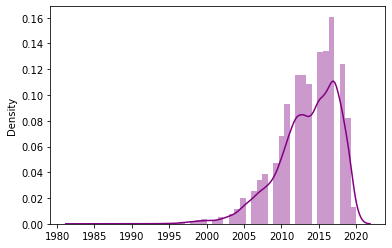

In [30]:
sns.distplot(x=df['year'],color='purple')

In [31]:
df['current_year']=2021

In [32]:
df['age_of _car']=df['current_year']-df['year']

In [33]:
df.drop(['year','current_year'],axis=1,inplace=True)

In [34]:
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,age_of _car
0,Maruti 800 AC,60000.0,70000,Petrol,Individual,Manual,First Owner,14
1,Maruti Wagon R LXI Minor,135000.0,50000,Petrol,Individual,Manual,First Owner,14
2,Hyundai Verna 1.6 SX,600000.0,100000,Diesel,Individual,Manual,First Owner,9
3,Datsun RediGO T Option,250000.0,46000,Petrol,Individual,Manual,First Owner,4
4,Honda Amaze VX i-DTEC,450000.0,141000,Diesel,Individual,Manual,Second Owner,7


##km_driven

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


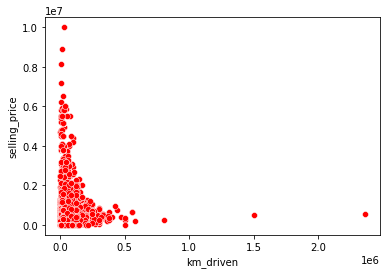

In [35]:
sns.scatterplot(df['km_driven'],df['selling_price'],color='red')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


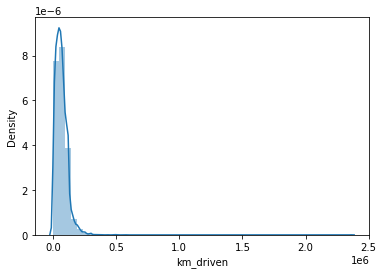

In [36]:
sns.distplot(df['km_driven'])

##fuel

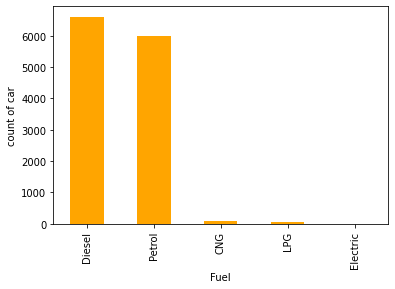

In [37]:
(df['fuel'].value_counts()).to_frame().plot(kind='bar',color='orange',legend=None)
plt.xlabel('Fuel')
plt.ylabel('count of car')
plt.show()

Text(0, 0.5, 'Average price wrt fuel')

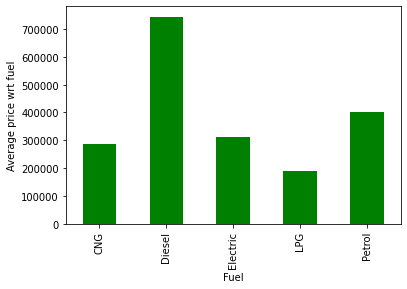

In [38]:
df.groupby('fuel')['selling_price'].mean().to_frame().plot(kind='bar',color='green',legend=None)
plt.xlabel('Fuel')
plt.ylabel('Average price wrt fuel')

##seller_type

In [39]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


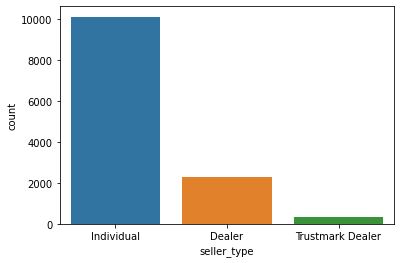

In [40]:
sns.countplot(df['seller_type'])

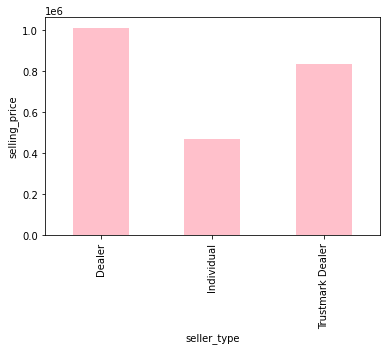

In [41]:
df.groupby('seller_type')['selling_price'].mean().to_frame().plot(kind='bar',color='pink',legend=None)
plt.xlabel('seller_type')
plt.ylabel('selling_price')
plt.show()

##transmission

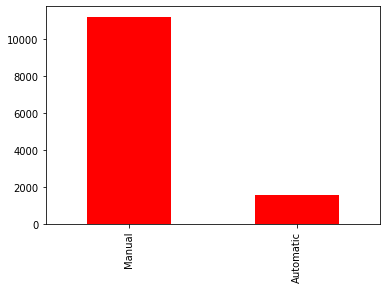

In [42]:
df['transmission'].value_counts().to_frame().plot(kind='bar',color='red',legend=None)

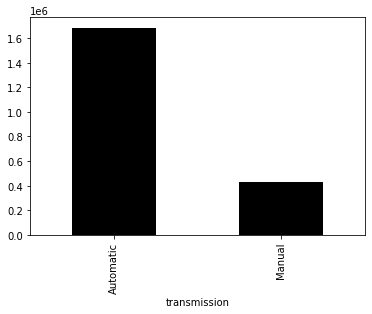

In [43]:
df.groupby('transmission')['selling_price'].mean().to_frame().plot(kind='bar',color='black',legend=None)

##owner

In [44]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car', 0, 1, 3], dtype=object)

In [45]:
def car_owner(owner):
  if owner == 0:
    return 'New car'
  elif owner== 1:
    return 'First Owner'
  elif owner ==3:
    return 'Third Owner'
  else:
    return owner


In [46]:
df['owner']=df['owner'].apply(lambda x : car_owner(x) )

In [47]:
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,age_of _car
0,Maruti 800 AC,60000.0,70000,Petrol,Individual,Manual,First Owner,14
1,Maruti Wagon R LXI Minor,135000.0,50000,Petrol,Individual,Manual,First Owner,14
2,Hyundai Verna 1.6 SX,600000.0,100000,Diesel,Individual,Manual,First Owner,9
3,Datsun RediGO T Option,250000.0,46000,Petrol,Individual,Manual,First Owner,4
4,Honda Amaze VX i-DTEC,450000.0,141000,Diesel,Individual,Manual,Second Owner,7


In [48]:
df[df['owner']=='Test Drive Car'].head(30)

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,age_of _car
1714,Ford Freestyle Titanium Diesel,784000.0,101,Diesel,Dealer,Manual,Test Drive Car,1
1715,Ford Figo Titanium,635000.0,101,Petrol,Dealer,Manual,Test Drive Car,1
1716,Ford Ecosport 1.5 Diesel Titanium,1000000.0,101,Diesel,Dealer,Manual,Test Drive Car,1
1774,Ford Aspire Titanium BSIV,828999.0,1010,Petrol,Dealer,Manual,Test Drive Car,1
1775,Ford EcoSport 1.5 Ti VCT MT Titanium BE BSIV,1119000.0,1010,Petrol,Dealer,Manual,Test Drive Car,1
1776,Ford Figo Titanium,746000.0,1111,Petrol,Dealer,Manual,Test Drive Car,1
1777,Ford Ecosport 1.5 Petrol Trend,1030000.0,1010,Petrol,Dealer,Manual,Test Drive Car,1
1778,Ford EcoSport 1.5 TDCi Titanium Plus BSIV,1334000.0,1010,Diesel,Dealer,Manual,Test Drive Car,1
1779,Ford Freestyle Titanium,811999.0,1010,Petrol,Dealer,Manual,Test Drive Car,1
1780,Ford Ecosport Thunder Edition Diesel,1331000.0,1010,Diesel,Dealer,Manual,Test Drive Car,1


In [49]:
df.select_dtypes(include=[np.number]).head()

,selling_price,km_driven,age_of _car
0,60000.0,70000,14
1,135000.0,50000,14
2,600000.0,100000,9
3,250000.0,46000,4
4,450000.0,141000,7


In [50]:
df.loc[:, df.dtypes == np.object].drop('name',axis=1).head()

,fuel,seller_type,transmission,owner
0,Petrol,Individual,Manual,First Owner
1,Petrol,Individual,Manual,First Owner
2,Diesel,Individual,Manual,First Owner
3,Petrol,Individual,Manual,First Owner
4,Diesel,Individual,Manual,Second Owner


In [51]:
cat=list(df.loc[:, df.dtypes == np.object].drop('name',axis=1).columns)
cat

['fuel', 'seller_type', 'transmission', 'owner']

In [52]:

for col in cat:
   a= df[col]
   print(col)
   label=pd.get_dummies(a,drop_first=True)
   df=pd.concat([df,label],axis=1)


fuel
seller_type
transmission
owner


In [53]:
df.drop(cat,axis=1,inplace=True)

In [54]:
df.head()

,name,selling_price,km_driven,age_of _car,Diesel,Electric,LPG,Petrol,Individual,Trustmark Dealer,Manual,Fourth & Above Owner,New car,Second Owner,Test Drive Car,Third Owner
0,Maruti 800 AC,60000.0,70000,14,0,0,0,1,1,0,1,0,0,0,0,0
1,Maruti Wagon R LXI Minor,135000.0,50000,14,0,0,0,1,1,0,1,0,0,0,0,0
2,Hyundai Verna 1.6 SX,600000.0,100000,9,1,0,0,0,1,0,1,0,0,0,0,0
3,Datsun RediGO T Option,250000.0,46000,4,0,0,0,1,1,0,1,0,0,0,0,0
4,Honda Amaze VX i-DTEC,450000.0,141000,7,1,0,0,0,1,0,1,0,0,1,0,0


In [55]:
df['selling_price'].max()

10000000.0

In [56]:
df['selling_price'].min()

0.1

In [57]:
name=df.groupby('name')['selling_price'].mean().reset_index()

In [58]:
name.head()

,name,selling_price
0,800,0.35
1,Activa 3g,0.31
2,Activa 4g,0.40
3,Ambassador CLASSIC 1500 DSL AC,105000.00
4,Ambassador Classic 2000 DSZ AC PS,99000.00


In [59]:
name.describe()

,selling_price
count,2.609000e+03
mean,6.009676e+05
std,7.243289e+05
min,1.750000e-01
25%,2.303076e+05
50%,4.385714e+05
75%,6.850000e+05
max,1.000000e+07


In [60]:
name['selling_price'].max()

10000000.0

In [61]:
name['selling_price'].min()

0.175

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


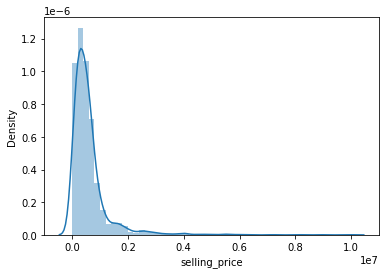

In [62]:
sns.distplot(name['selling_price'])

In [63]:
name.shape

(2609, 2)

In [64]:
name[name['selling_price']<1000].shape # very low price 0

(98, 2)

In [65]:
name[(name['selling_price']>100) & (name['selling_price']<10000)].shape

(0, 2)

In [66]:
name[(name['selling_price']>10000) & (name['selling_price']<100000)].shape  #price 1

(140, 2)

In [67]:
name[(name['selling_price']>100000) & (name['selling_price']<1000000)].shape #price 2

(2035, 2)

In [68]:
name[(name['selling_price']>1000000) & (name['selling_price']<100000000)].shape #PRICE 3

(309, 2)

In [69]:
def get(price):
  if price < 1000:
    return 0
  elif price >1000 and price < 100000:
    return 1
  elif price >100000 and price < 1000000:
    return 2
  else:
    return 3


In [70]:
name['coded_name']=name['selling_price'].apply(lambda x: get(x))

In [71]:
name.drop('selling_price',axis=1,inplace=True)

In [72]:
name.shape

(2609, 2)

In [73]:
df.shape

(12769, 16)

In [74]:
df=pd.merge(df,name,how='inner',left_on='name',right_on='name')

In [75]:
df=df.drop('name',axis=1)

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [77]:
x=df.drop('selling_price',axis=1)
y=df['selling_price']

In [78]:
y

0        60000.00
1        60000.00
2        95000.00
3        65000.00
4        60000.00
           ...   
12764        2.25
12765        6.00
12766        7.40
12767        5.65
12768        6.40
Name: selling_price, Length: 12769, dtype: float64

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2021, test_size=0.20)

In [80]:
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

#Linear regression

In [81]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
y_pred=regressor.predict(x_test)
y_pred_train=regressor.predict(x_train)

In [111]:
from sklearn.metrics import r2_score
test_r2=r2_score(y_test,y_pred)
test_r2

0.594829257878106

In [108]:
train_r2=r2_score(y_train,y_pred_train)
train_r2

0.5781799077600462

In [102]:
regressor.coef_

array([ -55113.97055032,  -72019.86397828,  131094.14698214,
         -6545.55915292,    9040.6555854 ,   30916.61277616,
        -67387.83426178,  -24835.22573895, -231211.47072407,
          3795.74038257,  142229.2913459 ,  -28075.22441122,
         13462.5401542 ,  -10299.56736577,  383614.99742602])

In [126]:
p=x_train.shape[1]
n=x_train.shape[0]

In [127]:
n,p

(10215, 15)

In [128]:
 adjusted_r2=1-(1-train_r2)*(n-1)/(n-p-1)
 adjusted_r2

0.577559523272979

#polynomial Regression

In [104]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [105]:
poly=PolynomialFeatures(degree=2)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.transform(x_test)  
                                      
                                      
                                      
lr = LinearRegression()
lr.fit(x_train_poly, y_train)
y_train_pred=lr.predict(x_train_poly)
y_test_pred=lr.predict(x_test_poly)

                                    


train_mse=mean_squared_error(y_train,y_train_pred)
                            
test_mse=mean_squared_error(y_test,y_test_pred) 
                      

In [132]:
a=r2_score(y_train,y_train_pred)
a

0.7686414330617278

In [131]:
 1-(1-a)*(n-1)/(n-p-1)

0.7683011665155886

#RIDGE and LASSO 

In [133]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV

In [151]:
alphas = [0.0001,0.001,0.01,0.1,1,5,10,100,1000]
print('different alpha values:', alphas)



different alpha values: [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 100, 1000]


In [170]:

r2=[]
adjusted_r2=[]
ridge_weight = []


for alpha in alphas:    
    ridge = Ridge(alpha = alpha, fit_intercept = True)
    ridge.fit(x_train, y_train)
    y_train_pred=ridge.predict(x_train)
    a=r2_score(y_train,y_train_pred)
    r2.append(a)
    adj= 1-(1-a)*(n-1)/(n-p-1)
    adjusted_r2.append(adj)
    ridge_weight.append(ridge.coef_)

In [171]:
ridge_weight

[array([ -55113.9701711 ,  -72019.86582667,  131094.09532961,
          -6545.56011693,    9040.64799796,   30916.56018317,
         -67387.83485047,  -24835.22536059, -231211.47144808,
           3795.73986197,  142229.28407666,  -28075.22471605,
          13462.54022529,  -10299.56747603,  383614.98798591]),
 array([ -55113.96675812,  -72019.88246224,  131093.63045971,
          -6545.56879301,    9040.57971144,   30916.08684922,
         -67387.84014865,  -24835.22195543, -231211.47796421,
           3795.73517664,  142229.21865351,  -28075.22745951,
          13462.54086516,  -10299.56846834,  383614.903025  ]),
 array([ -55113.93262824,  -72020.04881885,  131088.98206355,
          -6545.65554765,    9039.89688974,   30911.35381298,
         -67387.89313006,  -24835.18790433, -231211.54312287,
           3795.68832469,  142228.56442426,  -28075.25489279,
          13462.54726356,  -10299.57839143,  383614.0534187 ]),
 array([ -55113.59132901,  -72021.71248268,  131042.52835771,
  

In [172]:
r2

[0.5781799077600461,
 0.5781799077600231,
 0.5781799077577316,
 0.5781799075287628,
 0.5781798848134135,
 0.5781793533797679,
 0.578177779012172,
 0.5780499928555924,
 0.5733096834324519]

In [173]:
adjusted_r2

[0.5775595232729788,
 0.5775595232729558,
 0.577559523270661,
 0.5775595230413553,
 0.577559500292598,
 0.5775589680773556,
 0.5775573913942862,
 0.5774294172984628,
 0.5726821361485502]

In [174]:
lasso_weight = []
for alpha in alphas:    
    lasso = Lasso(alpha = alpha, fit_intercept = True)
    lasso.fit(x_train, y_train)
    lasso_weight.append(lasso.coef_)

In [175]:
lasso_weight

[array([ -55113.97050372,  -72019.86395507,  131094.13993361,
          -6545.5591929 ,    9040.65447742,   30916.60569172,
         -67387.83419734,  -24835.22558768, -231211.4707681 ,
           3795.7402376 ,  142229.29111386,  -28075.22438158,
          13462.54007758,  -10299.56729003,  383614.99716706]),
 array([ -55113.9700842 ,  -72019.86374609,  131094.07647566,
          -6545.55955315,    9040.64450264,   30916.5419111 ,
         -67387.83361739,  -24835.22422629, -231211.47116444,
           3795.73893277,  142229.28902556,  -28075.2241149 ,
          13462.53938805,  -10299.56660829,  383614.99483656]),
 array([ -55113.96588918,  -72019.8616565 ,  131093.44192952,
          -6545.56315505,    9040.54475955,   30915.9041376 ,
         -67387.82781788,  -24835.21061235, -231211.47512779,
           3795.72588463,  142229.26814249,  -28075.22144803,
          13462.53249269,  -10299.55979092,  383614.97153128]),
 array([ -55113.92393967,  -72019.84076118,  131087.09659165,
  

In [160]:
def weight_versus_alpha_plot(weight, alphas, features):
    """
    Pass in the estimated weight, the alpha value and the names
    for the features and plot the model's estimated coefficient weight 
    for different alpha values
    """
    fig = plt.figure(figsize = (8, 6))
    
    # ensure that the weight is an array
    weight = np.array(weight)
    for col in range(weight.shape[1]):
        plt.plot(alphas, weight[:, col], label = features[col])

    plt.axhline(0, color = 'black', linestyle = '--', linewidth = 3)
    
    # manually specify the coordinate of the legend
    plt.legend(bbox_to_anchor = (1.3, 0.9))
    plt.title('Coefficient Weight as Alpha Grows')
    plt.ylabel('Coefficient weight')
    plt.xlabel('alpha')
    return fig

In [176]:
features=list(x.columns)

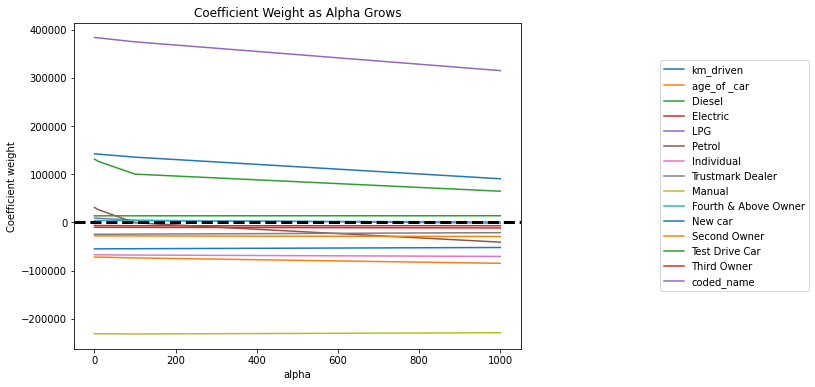

In [177]:

ridge_fig = weight_versus_alpha_plot(ridge_weight, alphas, features)

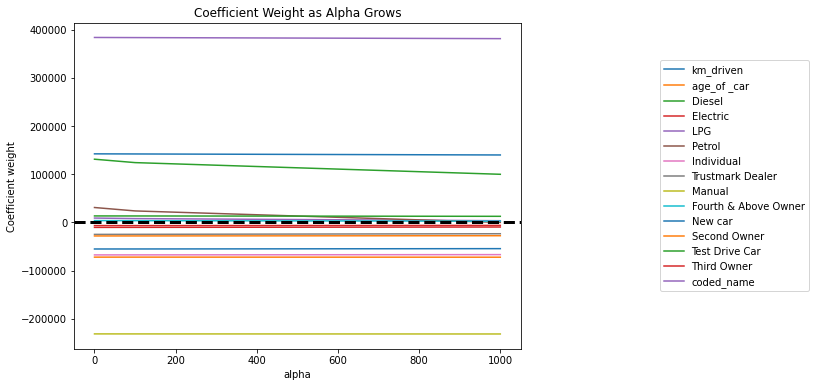

In [179]:

lasso_fig = weight_versus_alpha_plot(lasso_weight, alphas, features)